In [7]:
import os, sys
print("Python:", sys.version)
print("Working dir:", os.getcwd())
print("metadata.csv existe?", os.path.exists(r'C:\Users\Alexi\Desktop\proyecto-cancer-mama\data\raw\metadata.csv'))

Python: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]
Working dir: c:\Users\Alexi\Desktop\proyecto-cancer-mama\notebooks\exploratory_analysis
metadata.csv existe? True


In [18]:
#Celda 1: Importar Librerías
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar el estilo de las visualizaciones
sns.set_style('whitegrid')
print("--- Librerías importadas ---")

--- Librerías importadas ---


In [4]:
# Celda 2: Configuración de Rutas y Verificación
PROJECT_ROOT = 'C:/Users/Alexi/Desktop/proyecto-cancer-mama'
IMAGES_BASE_PATH = 'G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/'

# Construcción de rutas y verificación
DATA_RAW_PATH = os.path.join(PROJECT_ROOT, 'data', 'raw')

# Construcción de rutas y verificación
print(f"Ruta de datos CSV: {DATA_RAW_PATH}")
print(f"Ruta de imágenes: {IMAGES_BASE_PATH}")

Ruta de datos CSV: C:/Users/Alexi/Desktop/proyecto-cancer-mama\data\raw
Ruta de imágenes: G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/


In [28]:
# Se cargan los cuatro archivos CSV y se añade la columna 'split'.
print("\n--- Cargando y unificando metadatos ---")


--- Cargando y unificando metadatos ---


In [5]:
# Rutas de los CSV
mass_train_path = os.path.join(DATA_RAW_PATH, 'mass_case_description_train_set.csv')
mass_test_path  = os.path.join(DATA_RAW_PATH, 'mass_case_description_test_set.csv')
calc_train_path = os.path.join(DATA_RAW_PATH, 'calc_case_description_train_set.csv')
calc_test_path  = os.path.join(DATA_RAW_PATH, 'calc_case_description_test_set.csv')

In [6]:
# Cargar los CSV en DataFrames
df_mass_train = pd.read_csv(mass_train_path)
df_mass_test  = pd.read_csv(mass_test_path)
df_calc_train = pd.read_csv(calc_train_path)
df_calc_test  = pd.read_csv(calc_test_path)

In [7]:
# Concatenar
df_mass = pd.concat([df_mass_train, df_mass_test], ignore_index=True)
df_calc = pd.concat([df_calc_train, df_calc_test], ignore_index=True)

In [8]:
# Dataset final
df = pd.concat([df_mass, df_calc], ignore_index=True)

In [9]:
display(df.head())

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,breast density,calc type,calc distribution
0,P_00001,3.0,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,NaN,NaN,NaN
1,P_00001,3.0,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,NaN,NaN,NaN
2,P_00004,3.0,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,NaN,NaN,NaN
3,P_00004,3.0,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,NaN,NaN,NaN
4,P_00004,3.0,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,NaN,NaN,NaN


In [10]:
#Análisis Básico del DataFrame
df.info()
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               3568 non-null   object 
 1   breast_density           1696 non-null   float64
 2   left or right breast     3568 non-null   object 
 3   image view               3568 non-null   object 
 4   abnormality id           3568 non-null   int64  
 5   abnormality type         3568 non-null   object 
 6   mass shape               1692 non-null   object 
 7   mass margins             1636 non-null   object 
 8   assessment               3568 non-null   int64  
 9   pathology                3568 non-null   object 
 10  subtlety                 3568 non-null   int64  
 11  image file path          3568 non-null   object 
 12  cropped image file path  3568 non-null   object 
 13  ROI mask file path       3568 non-null   object 
 14  breast density          

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,breast density,calc type,calc distribution
count,3568,1696.000000,3568,3568,3568.000000,3568,1692,1636,3568.000000,3568,3568.000000,3568,3568,3568,1872.000000,1848,1433
unique,1566,NaN,2,2,NaN,2,20,19,NaN,3,NaN,3103,3568,3568,NaN,47,9
top,P_01437,NaN,LEFT,MLO,NaN,calcification,IRREGULAR,CIRCUMSCRIBED,NaN,MALIGNANT,NaN,Calc-Training_P_00112_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Test_P_02176_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02176_RIGHT_MLO_1/1.3.6.1.4.1.9590...,NaN,PLEOMORPHIC,CLUSTERED
freq,24,NaN,1819,1896,NaN,1872,464,392,NaN,1457,NaN,7,1,1,NaN,813,935
mean,NaN,2.246462,NaN,NaN,1.252242,NaN,NaN,NaN,3.396581,NaN,3.647422,NaN,NaN,NaN,2.669338,NaN,NaN
std,NaN,0.874071,NaN,NaN,0.705416,NaN,NaN,NaN,1.314327,NaN,1.182583,NaN,NaN,NaN,0.932322,NaN,NaN
min,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,2.000000,NaN,NaN,1.000000,NaN,NaN,NaN,3.000000,NaN,3.000000,NaN,NaN,NaN,2.000000,NaN,NaN
50%,NaN,2.000000,NaN,NaN,1.000000,NaN,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,NaN,NaN
75%,NaN,3.000000,NaN,NaN,1.000000,NaN,NaN,NaN,4.000000,NaN,5.000000,NaN,NaN,NaN,3.000000,NaN,NaN


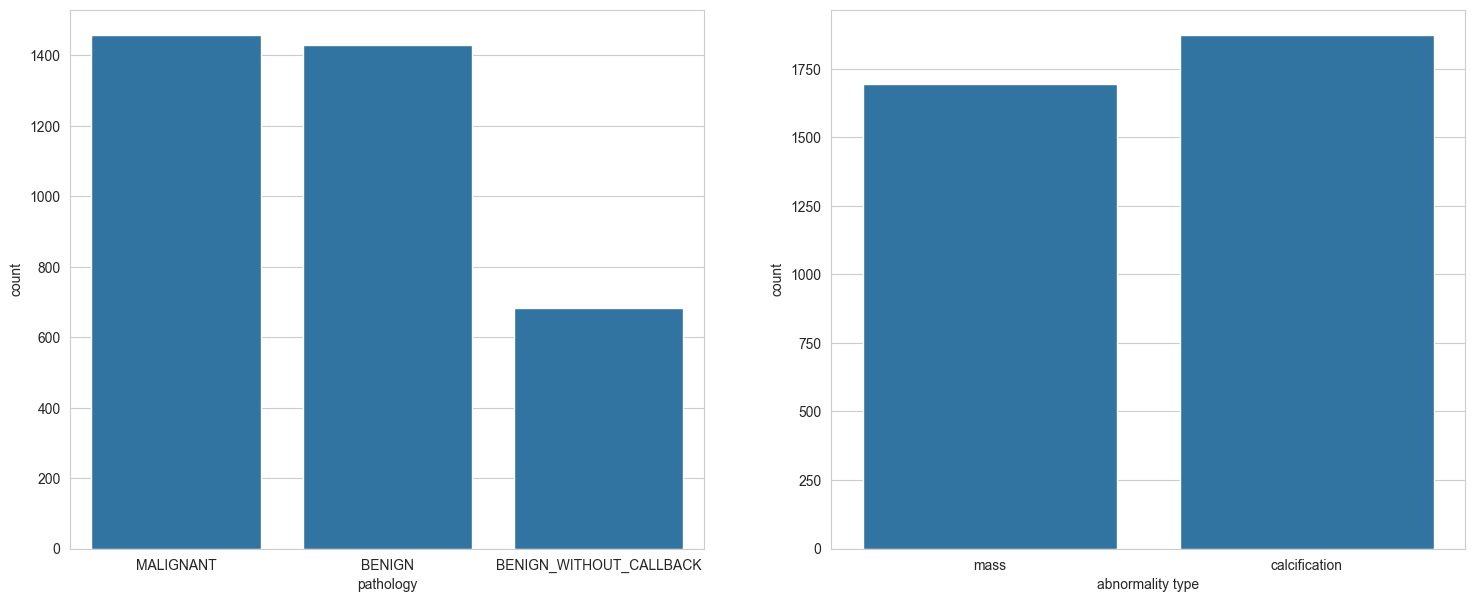

In [11]:
#Visualizar las Distribuciones
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.countplot(x='pathology', data=df, ax=axes[0])
sns.countplot(x='abnormality type', data=df, ax=axes[1])

plt.show()

In [22]:
print(df['image file path'].head(10))


0    Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1    Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2    Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3    Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4    Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...
5    Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.959...
6    Mass-Training_P_00009_RIGHT_MLO/1.3.6.1.4.1.95...
7    Mass-Training_P_00015_LEFT_MLO/1.3.6.1.4.1.959...
8    Mass-Training_P_00018_RIGHT_CC/1.3.6.1.4.1.959...
9    Mass-Training_P_00018_RIGHT_MLO/1.3.6.1.4.1.95...
Name: image file path, dtype: object


In [12]:
import glob

files = glob.glob(r"G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/**/*.dcm", recursive=True)
print("Ejemplo de archivos encontrados en disco:", files[:5])


Ejemplo de archivos encontrados en disco: ['G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM\\Calc-Test_P_00038_LEFT_CC\\1-1.dcm', 'G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM\\Calc-Test_P_00038_LEFT_CC\\08-29-2017-DDSM-NA-96009\\1.000000-full mammogram images-63992\\1-1.dcm', 'G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM\\Calc-Test_P_00038_LEFT_CC_1\\1-1.dcm', 'G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM\\Calc-Test_P_00038_LEFT_CC_1\\1-2.dcm', 'G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM\\Calc-Test_P_00038_LEFT_CC_1\\08-29-2017-DDSM-NA-94942\\1.000000-ROI mask images-18515\\1-1.dcm']


In [13]:
# --- Celda de Depuración Avanzada ---

print("--- Iniciando Depuración Avanzada de Rutas ---")

# 1. Verificar que la ruta base de imágenes existe
print(f"Verificando la ruta base: '{IMAGES_BASE_PATH}'")
if not os.path.exists(IMAGES_BASE_PATH):
    print("❌ ERROR CRÍTICO: La ruta base de imágenes (IMAGES_BASE_PATH) no existe. Revisa la Celda 2.")
else:
    print("✅ La ruta base de imágenes existe.")

    # 2. Extraer la primera parte de la ruta del CSV
    sample_row = df.iloc[0]
    path_from_csv = sample_row['image file path'].strip()
    
    # Dividimos la ruta por el separador y tomamos el primer elemento
    # Esto funciona tanto si el separador es '/' como si es '\\'
    first_folder_from_csv = os.path.normpath(path_from_csv).split(os.sep)[0]
    
    print(f"\\nLa primera carpeta en la ruta del CSV es: '{first_folder_from_csv}'")
    
    # 3. Construir la ruta a esta primera subcarpeta y verificar si existe
    path_to_check = os.path.join(IMAGES_BASE_PATH, first_folder_from_csv)
    print(f"Se verificará si existe esta ruta completa: '{path_to_check}'")
    
    if os.path.exists(path_to_check):
        print("✅ ¡Éxito! La subcarpeta fue encontrada. El problema puede estar en las partes más profundas de la ruta.")
    else:
        print("❌ ¡ERROR ENCONTRADO! La subcarpeta del CSV no existe dentro de la ruta base.")
        print("   SUGERENCIA: Abre el explorador de archivos en la carpeta 'CBIS-DDSM' y mira si la estructura de carpetas coincide.")
        print("   Por ejemplo, ¿ves una carpeta llamada 'Mass-Training_P_00001_LEFT_CC' directamente dentro de 'CBIS-DDSM'?")


--- Iniciando Depuración Avanzada de Rutas ---
Verificando la ruta base: 'G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/'
✅ La ruta base de imágenes existe.
\nLa primera carpeta en la ruta del CSV es: 'Mass-Training_P_00001_LEFT_CC'
Se verificará si existe esta ruta completa: 'G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Mass-Training_P_00001_LEFT_CC'
✅ ¡Éxito! La subcarpeta fue encontrada. El problema puede estar en las partes más profundas de la ruta.



--- Generando visualizaciones ---


C:\Users\Alexi\AppData\Local\Temp\ipykernel_7360\1420912477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pathology', data=df, ax=axes[0], palette='viridis')


ValueError: Could not interpret value `split` for `x`. An entry with this name does not appear in `data`.

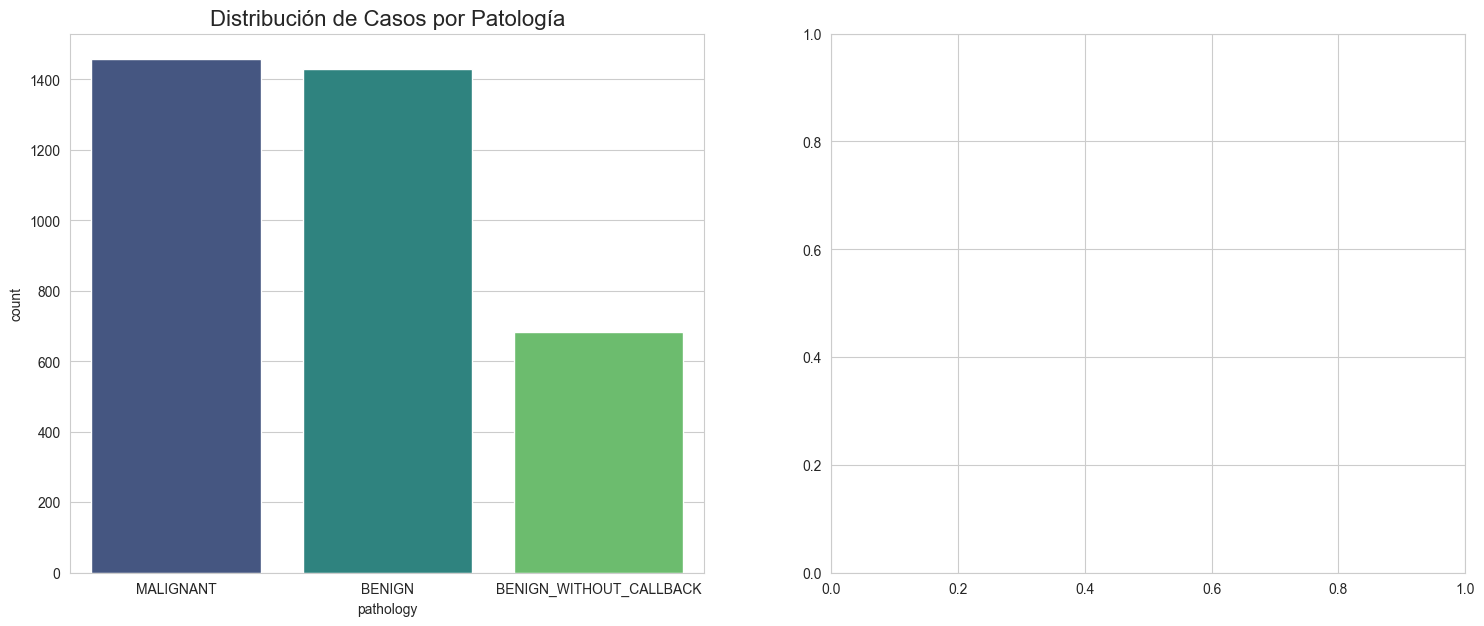

In [14]:
print("\n--- Generando visualizaciones ---")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.countplot(x='pathology', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Distribución de Casos por Patología', fontsize=16)

sns.countplot(x='split', data=df, ax=axes[1], palette='plasma')
axes[1].set_title('Distribución de Conjuntos (Train/Test)', fontsize=16)

plt.tight_layout()
plt.show()



--- Cargando una imagen DICOM de muestra ---
Buscando archivo .dcm en: 'G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Mass-Training_P_00001_LEFT_CC'
✅ ¡Éxito! Archivo DICOM encontrado en: 'G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Mass-Training_P_00001_LEFT_CC\1-1.dcm'


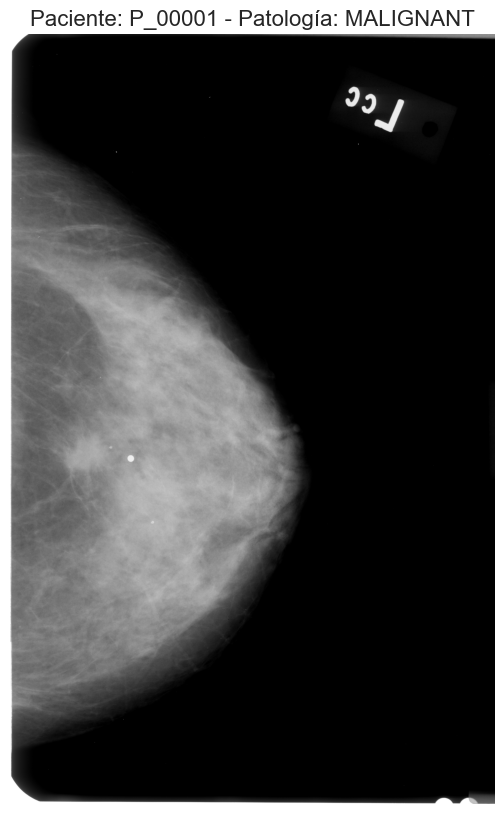


--- Fin del script ---


In [21]:
print("\n--- Cargando una imagen DICOM de muestra ---")

def find_dicom_in_folder(folder_path):
    """Encuentra el primer archivo .dcm en el nivel superior de una carpeta."""
    if not os.path.isdir(folder_path):
        return None
    for item in os.listdir(folder_path):
        if item.lower().endswith('.dcm'):
            return os.path.join(folder_path, item)
    return None

try:
    sample_row = df.iloc[0]
    path_from_csv = sample_row['image file path'].strip()
    patient_folder_name = path_from_csv.split('/')[0]
    full_patient_path = os.path.join(IMAGES_BASE_PATH, patient_folder_name)
    
    print(f"Buscando archivo .dcm en: '{full_patient_path}'")
    
    dicom_file_path = find_dicom_in_folder(full_patient_path)
    
    if dicom_file_path:
        print(f"✅ ¡Éxito! Archivo DICOM encontrado en: '{dicom_file_path}'")
        
        dicom_image = pydicom.dcmread(dicom_file_path)
        
        plt.figure(figsize=(10, 10))
        plt.imshow(dicom_image.pixel_array, cmap=plt.cm.gray)
        plt.title(f"Paciente: {sample_row['patient_id']} - Patología: {sample_row['pathology']}", fontsize=16)
        plt.axis('off')
        plt.show()
    else:
        print(f"❌ ERROR: No se encontró ningún archivo .dcm en la carpeta '{full_patient_path}'.")

except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

print("\n--- Fin del script ---")


<Axes: title={'center': 'Distribución de densidad mamaria'}, xlabel='breast density'>

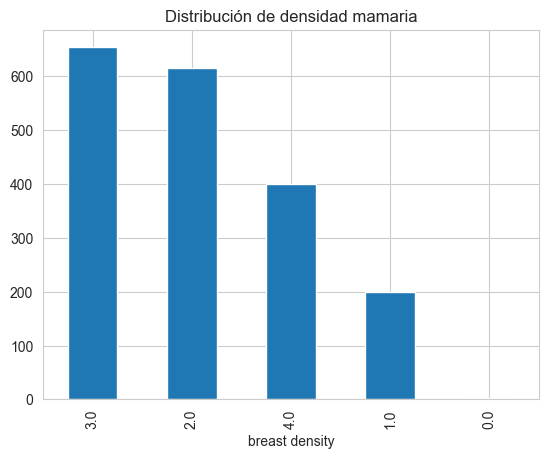

In [20]:
df['breast density'].value_counts().plot(kind="bar", title="Distribución de densidad mamaria")


In [23]:
pd.crosstab(df['breast density'], df['pathology'], normalize='index')


pathology,BENIGN,BENIGN_WITHOUT_CALLBACK,MALIGNANT
breast density,,,
0.0,0.000000,0.000000,1.000000
1.0,0.241206,0.532663,0.226131
2.0,0.340909,0.316558,0.342532
3.0,0.313456,0.298165,0.388379
4.0,0.486284,0.112219,0.401496


Cargando imagen desde la ruta verificada: G:/dataset/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Mass-Training_P_00001_LEFT_CC\1-1.dcm


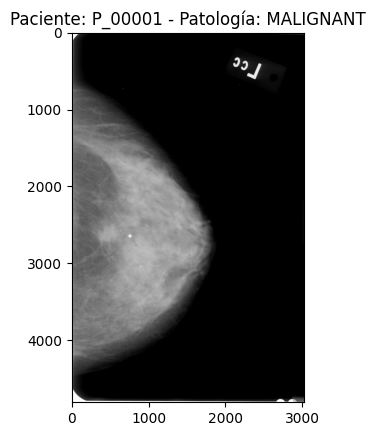

In [1]:
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import os

# --- PASO 1: Cargar el NUEVO DataFrame limpio ---
# Ya no usamos los CSVs originales, sino el que ya procesamos.
clean_csv_path = 'C:/Users/Alexi/Desktop/proyecto-cancer-mama/data/processed/metadata_clean.csv'
df_clean = pd.read_csv(clean_csv_path)


# --- PASO 2: Cargar una imagen de muestra (ahora mucho más fácil) ---

# Tomar la primera fila del DataFrame limpio
sample_row = df_clean.iloc[0]

# OBTENER LA RUTA DIRECTAMENTE DE LA COLUMNA CORRECTA
# No necesitamos construirla, ¡ya está lista!
full_image_path = sample_row['correct_image_path']

print(f"Cargando imagen desde la ruta verificada: {full_image_path}")

# Cargar la imagen DICOM
dicom_image = pydicom.dcmread(full_image_path)

# Visualizar la imagen
plt.imshow(dicom_image.pixel_array, cmap=plt.cm.gray)
plt.title(f"Paciente: {sample_row['patient_id']} - Patología: {sample_row['pathology']}")
plt.show()